- 교통사고 발생량 어린이보호구역 vs 어린이비보호구역 비교
- 가해운전자 법규위반과 교통사고 발생량 비교 (법규위반 시 범칙금을 2배로 내야하는 보호구역 지정의 필요성 피력 가능)

### 교통사고 발생량

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [169]:
# 데이터 불러오기
accident = pd.read_csv('./공공데이터_어린이+교통사고+현황.csv', header=1)  # 컬럼을 0번째 행으로 바꾸기
accident = accident.drop('자치구별(1)', axis=1)  # 앞에 합계부분 필요 없다고 생각하여 제거
accident = accident.rename(columns={'자치구별(2)': '자치구별', '사고현황별(1)': '사고현황별'})  # 컬럼명 바꾸기
accident

,자치구별,사고현황별,발생건수 (건),사망자수 (명),부상자수 (명)
0,소계,어린이 교통사고,1164,3,1365
1,소계,어린이보호구역내 어린이 교통사고,77,1,78
2,소계,어린이 보행 사상자,-,2,414
3,종로구,어린이 교통사고,34,-,42
4,종로구,어린이보호구역내 어린이 교통사고,1,-,1
...,...,...,...,...,...
73,송파구,어린이보호구역내 어린이 교통사고,5,-,5
74,송파구,어린이 보행 사상자,-,-,26
75,강동구,어린이 교통사고,53,-,63
76,강동구,어린이보호구역내 어린이 교통사고,1,-,1


In [170]:
# '-'로 나타나있는 부분을 0으로 바꾸기
accident = accident.replace('-', 0)
accident

,자치구별,사고현황별,발생건수 (건),사망자수 (명),부상자수 (명)
0,소계,어린이 교통사고,1164,3,1365
1,소계,어린이보호구역내 어린이 교통사고,77,1,78
2,소계,어린이 보행 사상자,0,2,414
3,종로구,어린이 교통사고,34,0,42
4,종로구,어린이보호구역내 어린이 교통사고,1,0,1
...,...,...,...,...,...
73,송파구,어린이보호구역내 어린이 교통사고,5,0,5
74,송파구,어린이 보행 사상자,0,0,26
75,강동구,어린이 교통사고,53,0,63
76,강동구,어린이보호구역내 어린이 교통사고,1,0,1


In [171]:
# 숫자를 정수형으로 변환
accident[['발생건수 (건)','사망자수 (명)', '부상자수 (명)']] = accident[['발생건수 (건)','사망자수 (명)', '부상자수 (명)']].astype(int)

In [172]:
# 합계부분을 child라는 데이터프레임으로 따로 만들기
child = accident[:3]
child

,자치구별,사고현황별,발생건수 (건),사망자수 (명),부상자수 (명)
0,소계,어린이 교통사고,1164,3,1365
1,소계,어린이보호구역내 어린이 교통사고,77,1,78
2,소계,어린이 보행 사상자,0,2,414


In [173]:
# 그래프에 한글 나오도록!
matplotlib.rcParams['font.family'] = 'malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False     # 한글 폰트를 지정한 후 그래프에서 마이너스(-) 폰트가 깨지는 것을 막아줌

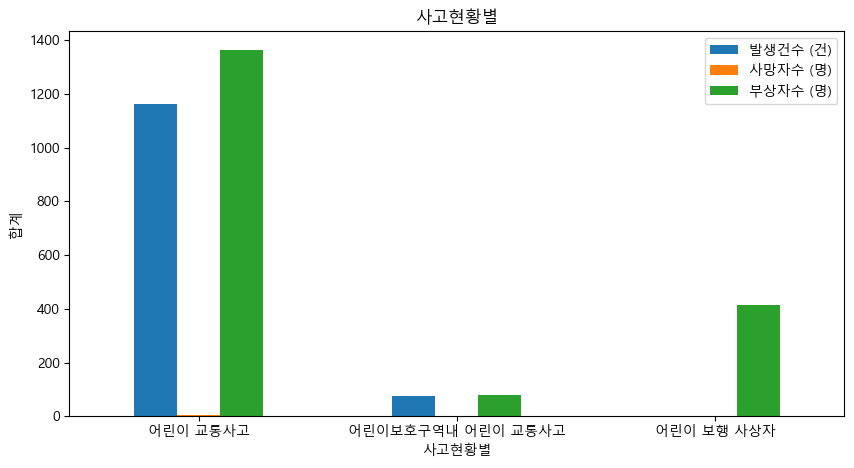

In [174]:
# < 전체 합계 현황 시각화 >
child.plot(x='사고현황별', y=['발생건수 (건)', '사망자수 (명)', '부상자수 (명)'], kind='bar', figsize=(10,5))
plt.title('사고현황별')
plt.ylabel('합계')
plt.xticks(rotation=0)  # x축 레이블을 가로로 표시
plt.show()

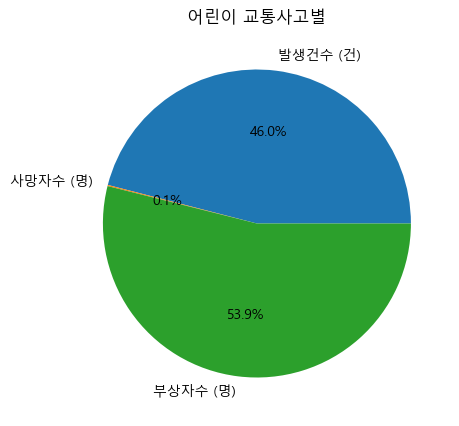

In [175]:
# < 어린이 교통사고 현황 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.pie(child[['발생건수 (건)', '사망자수 (명)', '부상자수 (명)']].values[0], labels=['발생건수 (건)', '사망자수 (명)', '부상자수 (명)'], autopct='%1.1f%%')
plt.title('어린이 교통사고별')
plt.show()

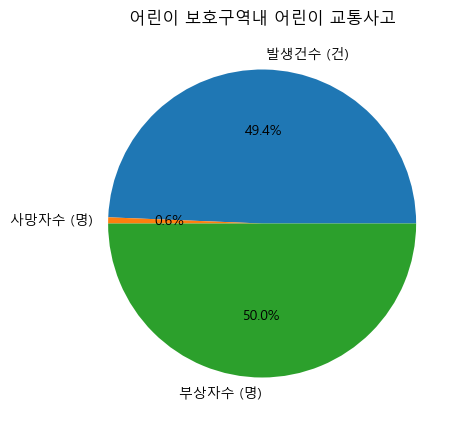

In [176]:
# < 어린이 보호구역내 어린이 교통사고 현황 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.pie(child[['발생건수 (건)', '사망자수 (명)', '부상자수 (명)']].values[1], labels=['발생건수 (건)', '사망자수 (명)', '부상자수 (명)'], autopct='%1.1f%%')
plt.title('어린이 보호구역내 어린이 교통사고')
plt.show()

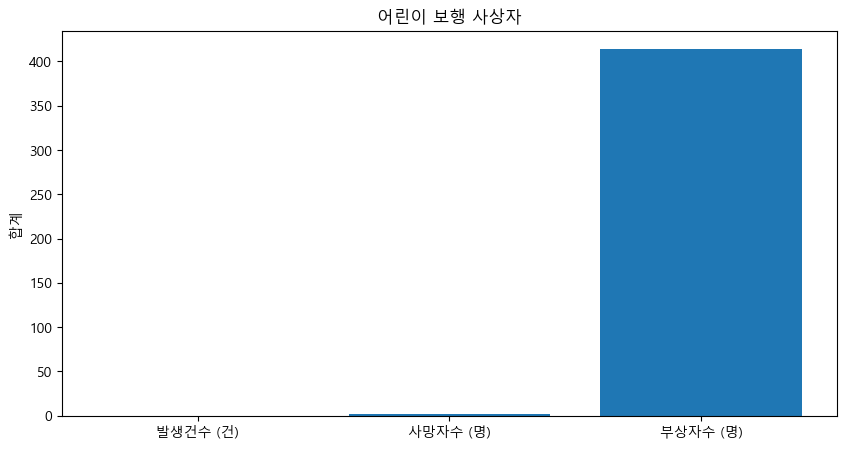

In [240]:
# < 어린이 보행 사상자 현황 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.bar(['발생건수 (건)', '사망자수 (명)', '부상자수 (명)'], child[['발생건수 (건)', '사망자수 (명)', '부상자수 (명)']].values[2])
plt.title('어린이 보행 사상자')
plt.ylabel('합계')
plt.show()

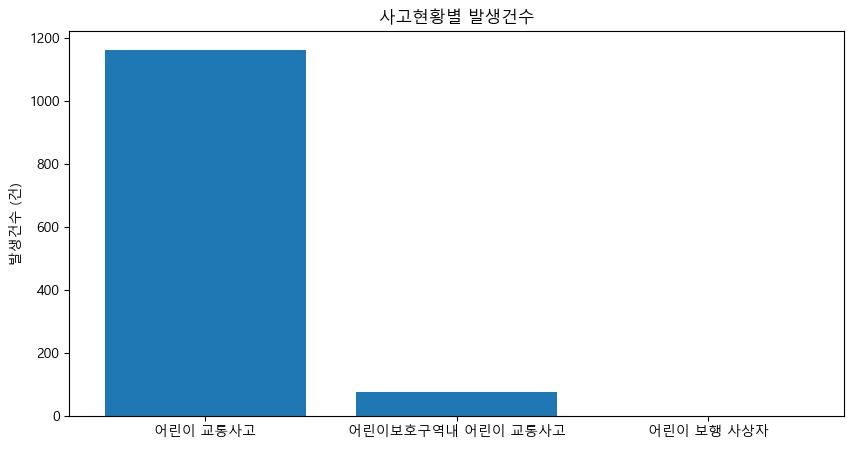

In [242]:
# < 교통사고 발생건수 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.bar(child['사고현황별'], child['발생건수 (건)'])
plt.title('사고현황별 발생건수')
plt.ylabel('발생건수 (건)')
plt.show()

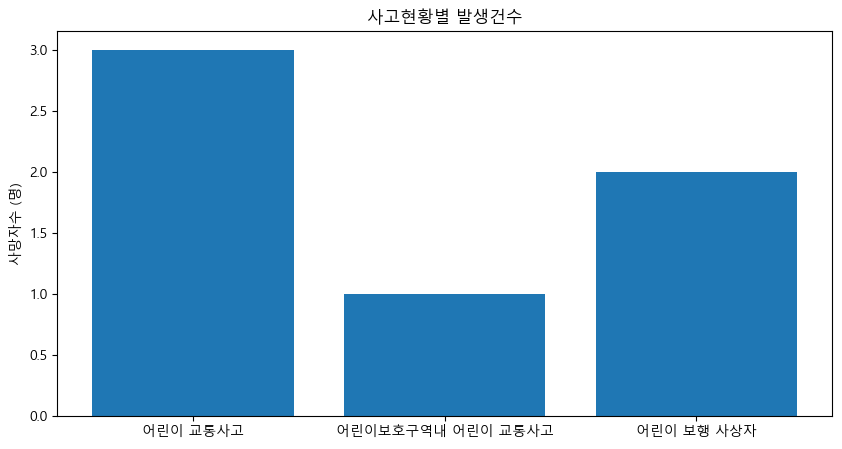

In [241]:
# < 교통사고 사망자수 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.bar(child['사고현황별'], child['사망자수 (명)'])
plt.title('사고현황별 발생건수')
plt.ylabel('사망자수 (명)')
plt.show()

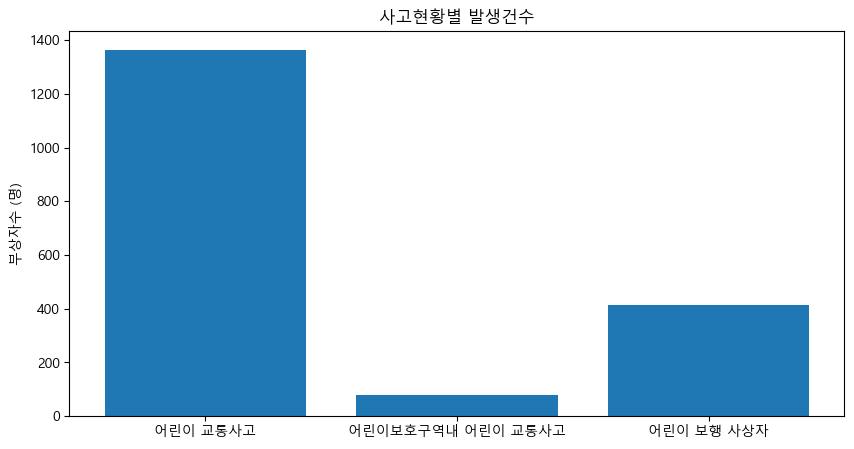

In [243]:
# < 교통사고 부상자수 시각화 > - 합계
plt.figure(figsize=(10,5))
plt.bar(child['사고현황별'], child['부상자수 (명)'])
plt.title('사고현황별 발생건수')
plt.ylabel('부상자수 (명)')
plt.show()

In [181]:
child2 = child[:2]
child2

,자치구별,사고현황별,발생건수 (건),사망자수 (명),부상자수 (명)
0,소계,어린이 교통사고,1164,3,1365
1,소계,어린이보호구역내 어린이 교통사고,77,1,78


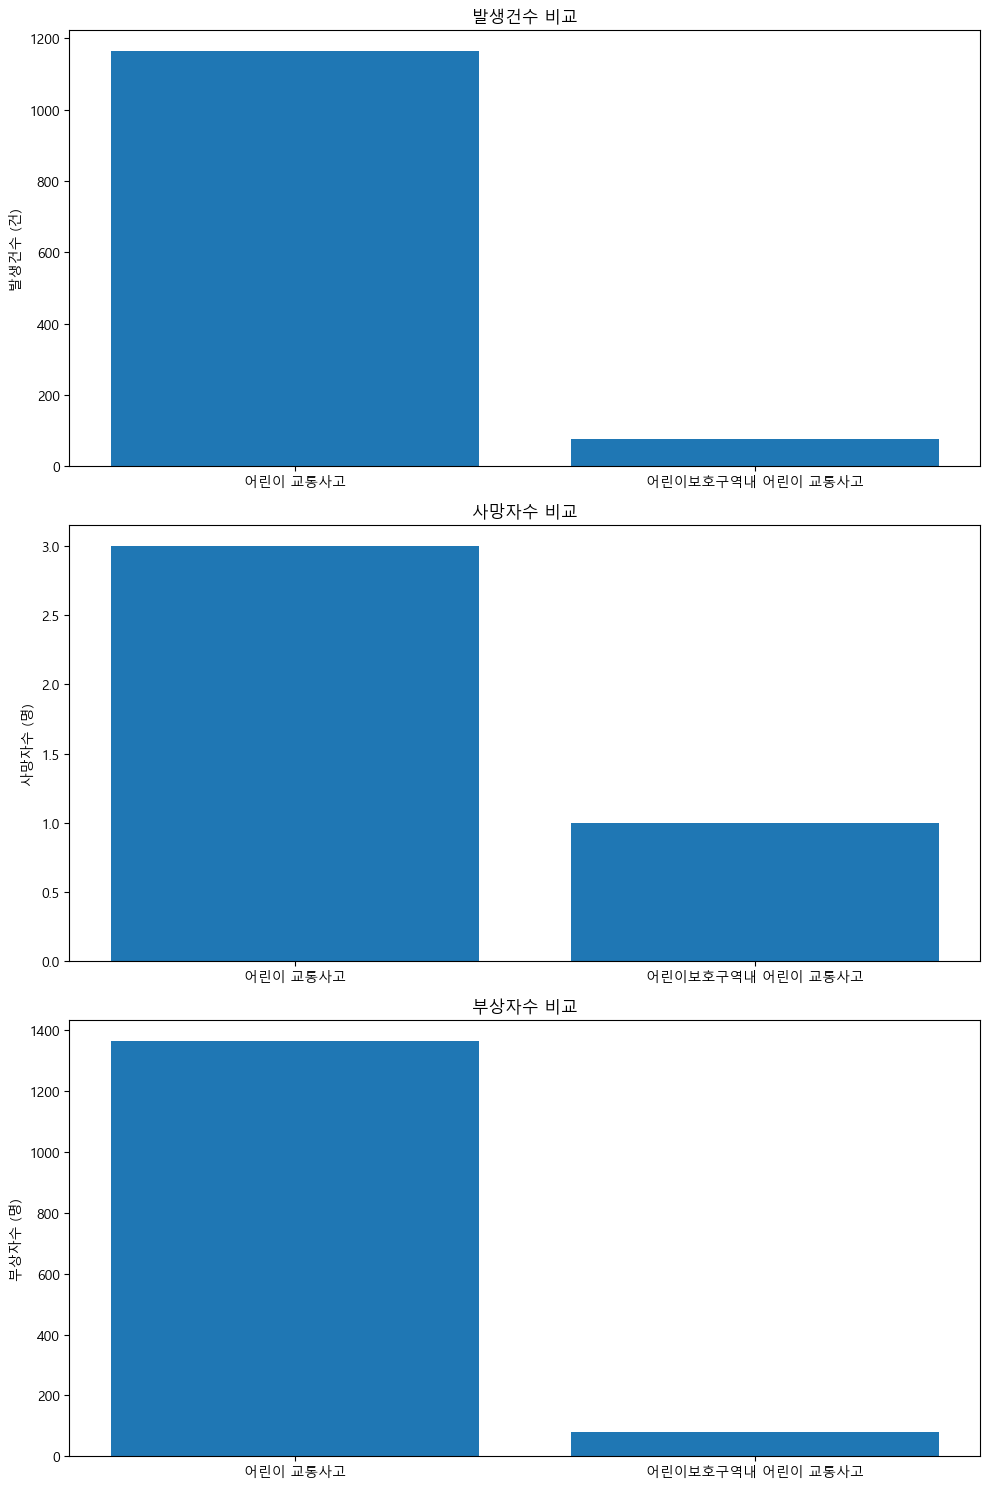

In [182]:
# < 어린이 보호구역 vs 비보호구역 사고 비교 > - 막대그래프
child2.set_index('사고현황별', inplace=True)  # 인덱스로설정

# 그래프
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(child2.index, child2['발생건수 (건)'])
ax[0].set_title('발생건수 비교')
ax[0].set_ylabel('발생건수 (건)')

ax[1].bar(child2.index, child2['사망자수 (명)'])
ax[1].set_title('사망자수 비교')
ax[1].set_ylabel('사망자수 (명)')

ax[2].bar(child2.index, child2['부상자수 (명)'])
ax[2].set_title('부상자수 비교')
ax[2].set_ylabel('부상자수 (명)')

plt.tight_layout()
plt.show()

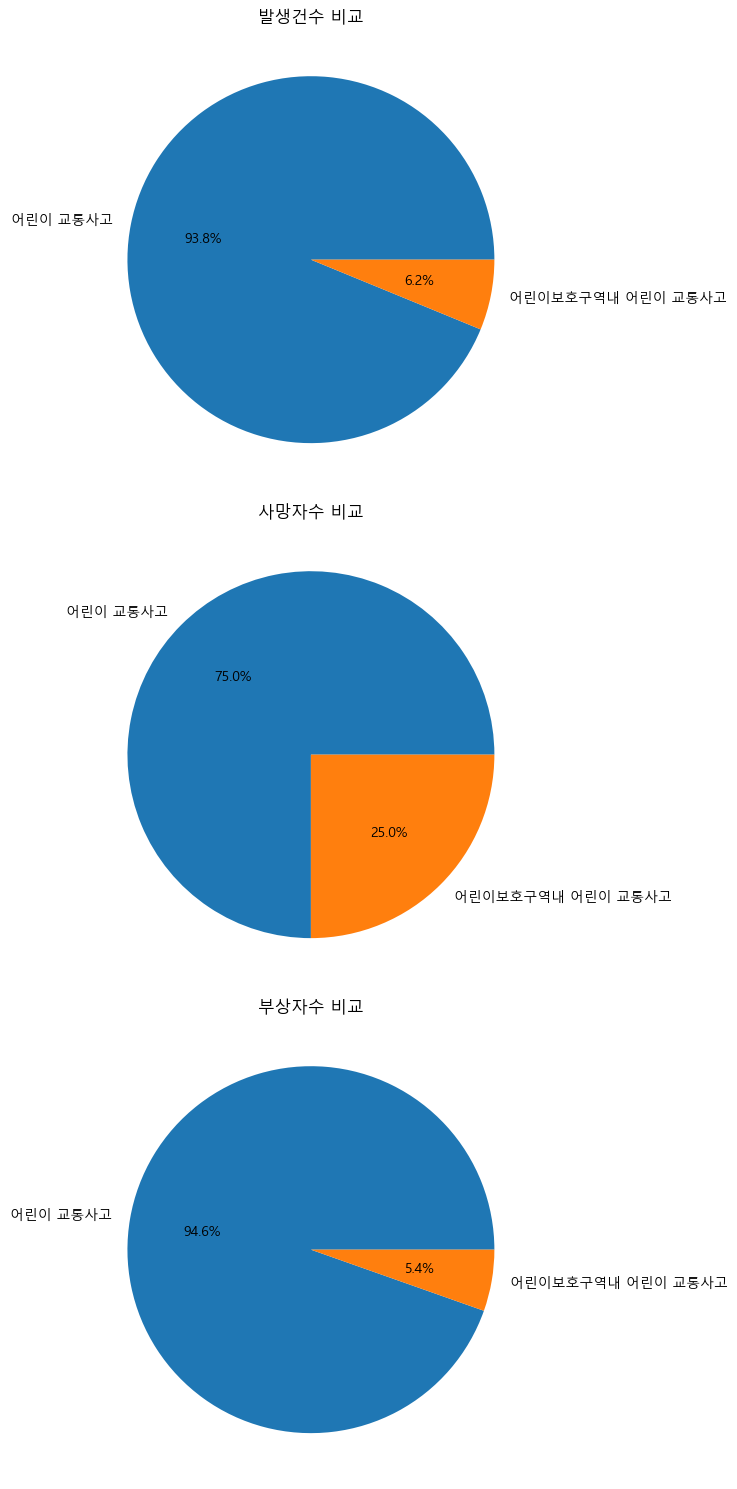

In [226]:
# # < 어린이 보호구역 vs 비보호구역 사고 비교 > - 원그래프
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# 발생건수 Pie Chart
ax[0].pie(child2['발생건수 (건)'], labels=child2.index, autopct='%1.1f%%')
ax[0].set_title('발생건수 비교')

# 사망자수 Pie Chart
ax[1].pie(child2['사망자수 (명)'], labels=child2.index, autopct='%1.1f%%')
ax[1].set_title('사망자수 비교')

# 부상자수 Pie Chart
ax[2].pie(child2['부상자수 (명)'], labels=child2.index, autopct='%1.1f%%')
ax[2].set_title('부상자수 비교')

plt.tight_layout()
plt.show()

### 법규위반에 따른 교통사고 발생량

In [187]:
#pip install xlrd


     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00


In [250]:
# 데이터 불러오기
violation = pd.read_excel('./TAAS_법규위반별_스쿨존내_어린이(12세이하).xls', header=2)
violation = violation.iloc[:3,:10]  # 앞부분 데이터만 필요
violation.set_index('기준년도', inplace=True)  # 기준년도 열을 인덱스로 변경
violation = violation.astype(int).T  # 보기 편하게 정수형으로 변환 + 전치
violation

기준년도,사고[건],사망[명],부상[명]
합계,514,3,529
안전운전의무불이행,203,2,206
교차로운행방법위반,1,0,1
보행자보호의무위반,169,0,174
직진우회전진행방해,3,0,4
기타,27,0,27
중앙선침범,6,0,8
신호위반,104,1,108
안전거리미확보,1,0,1


- 안전의무불이행 : 과속, 음주운전, 졸음운전 등 안전운전 의무를 위반한 경우
- 교차로운행방법위반 : 신호 무시, 우회전 또는 자회전 시 주의의무를 다하지 않는 등의 교차로 운행방법 위반한 경우
- 보행자보호의무위반 : 횡단보호에서 보행자를 우선하지 않거나, 보행자 보호 구간에서 속도를 줄이지 않는 경우 등
- 직진우회전진행방해 : 직진이나 우회전하는 차량이 다른 차량의 진행을 방해한 경우
- 신호 위반 : 빨간불에 진행 or 좌회전,우회전 신호 무시하는 경우

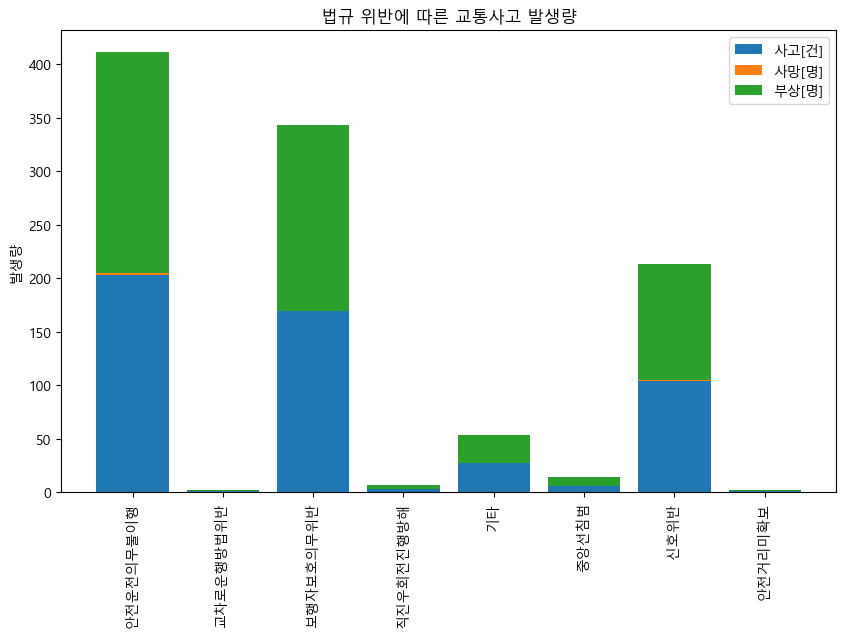

In [251]:
# < 각 법규 위반 항목에 대한 시각화 > - 막대그래프
# '합계' 행 제거
violation_without_total = violation.drop('합계')

fig, ax = plt.subplots(figsize=(10, 6))

# '사고[건]', '사망[명]', '부상[명]'에 대해 막대그래프 그리기
ax.bar(violation_without_total.index, violation_without_total['사고[건]'], label='사고[건]')
ax.bar(violation_without_total.index, violation_without_total['사망[명]'], label='사망[명]', bottom=violation_without_total['사고[건]'])
ax.bar(violation_without_total.index, violation_without_total['부상[명]'], label='부상[명]', bottom=violation_without_total['사고[건]']+violation_without_total['사망[명]'])

ax.set_title('법규 위반에 따른 교통사고 발생량')
ax.set_ylabel('발생량')
ax.legend()

plt.xticks(rotation=90)  # X축 레이블을 세로로 표시
plt.show()


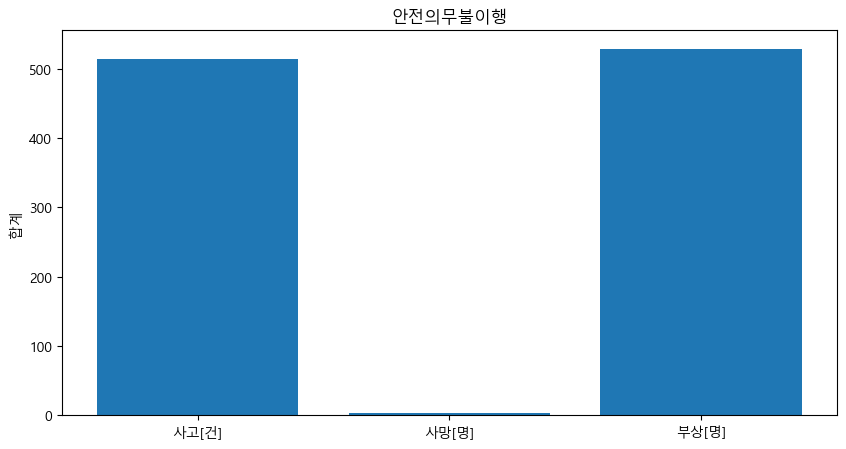

In [253]:
# < 합계 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[0])
plt.title('안전의무불이행')
plt.ylabel('합계')
plt.show()

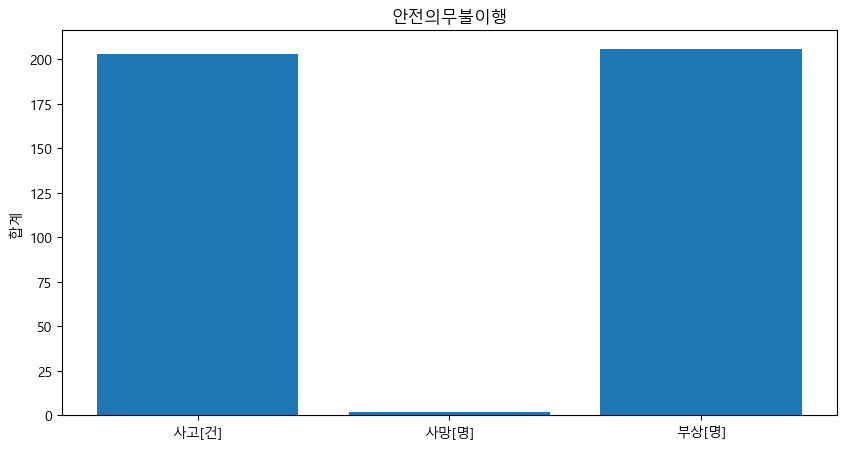

In [252]:
# < 안전의무불이행 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[1])
plt.title('안전의무불이행')
plt.ylabel('합계')
plt.show()

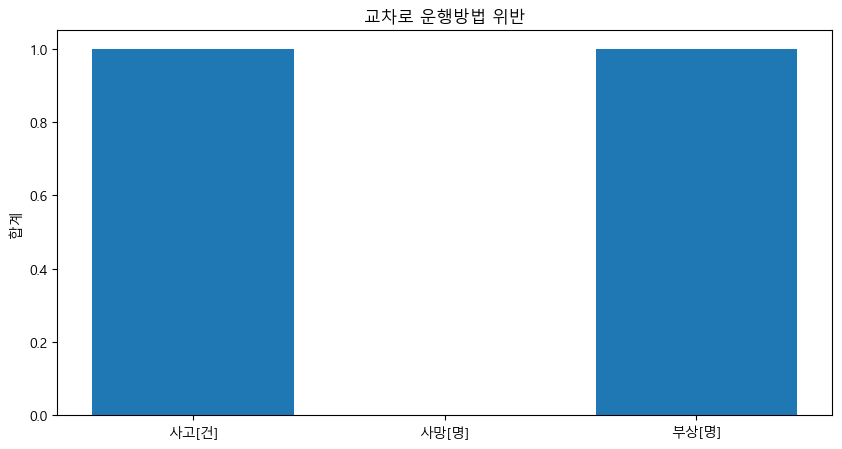

In [254]:
# < 교차로운행방법위반 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[2])
plt.title('교차로 운행방법 위반')
plt.ylabel('합계')
plt.show()

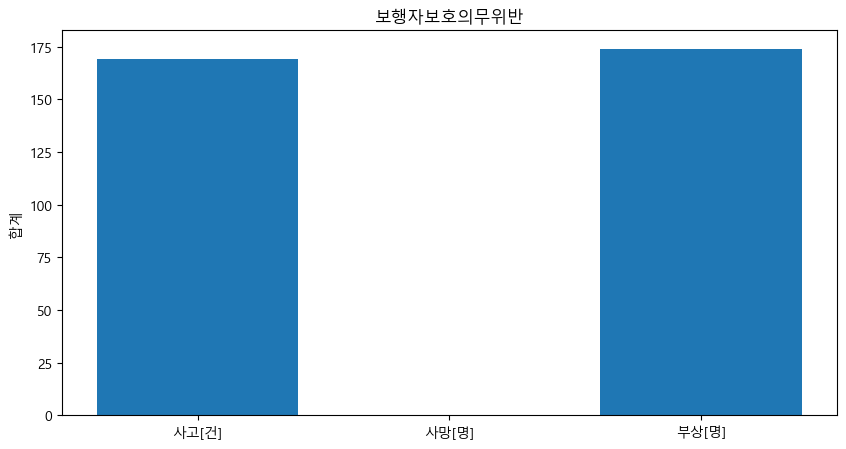

In [255]:
# < 보행자보호의무위반 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[3])
plt.title('보행자보호의무위반')
plt.ylabel('합계')
plt.show()

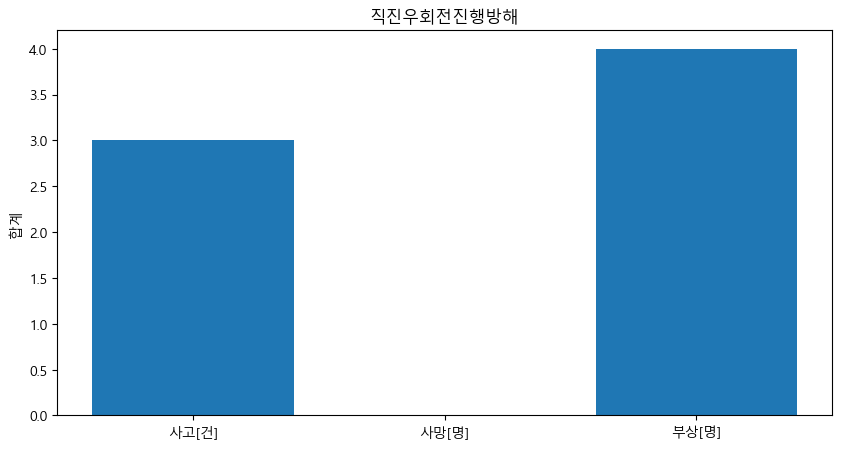

In [256]:
# < 직진우회전진행방해 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[4])
plt.title('직진우회전진행방해')
plt.ylabel('합계')
plt.show()

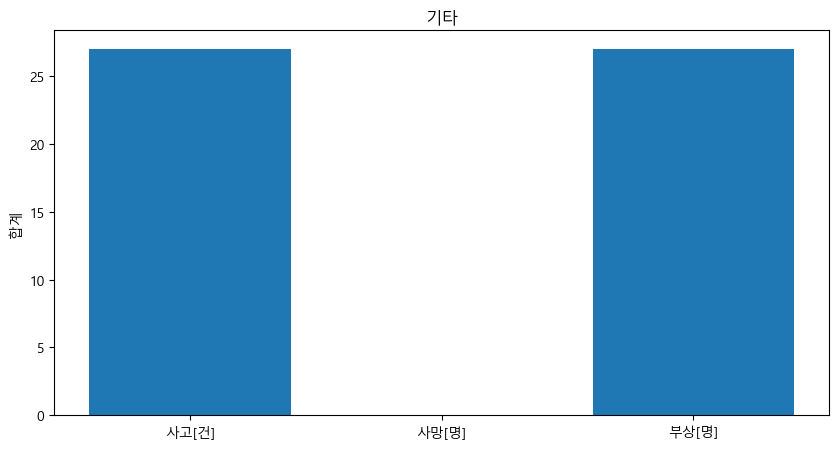

In [258]:
# < 기타 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[5])
plt.title('기타')
plt.ylabel('합계')
plt.show()

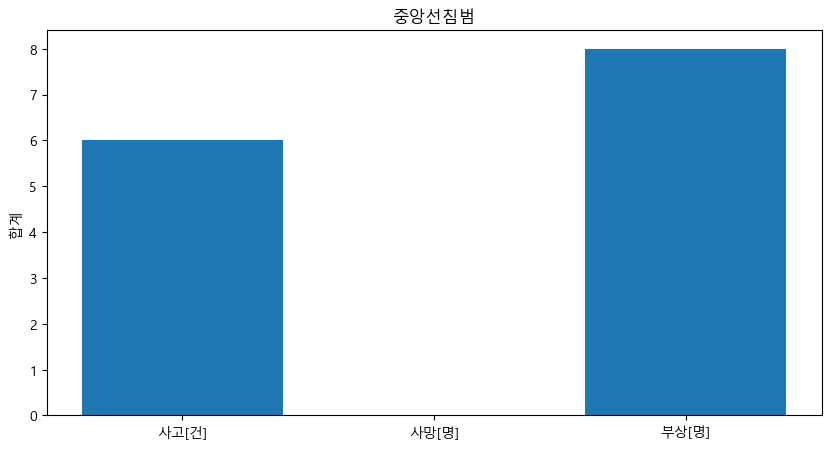

In [259]:
# < 중앙선침범 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[6])
plt.title('중앙선침범')
plt.ylabel('합계')
plt.show()

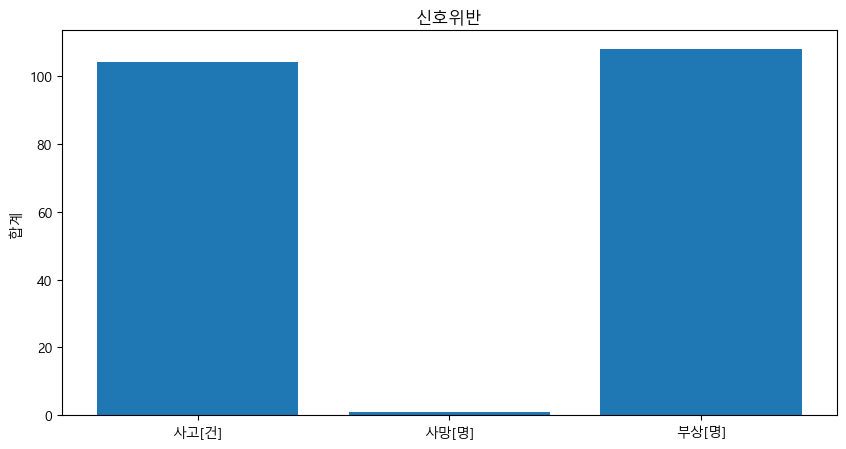

In [260]:
# < 신호위반 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[7])
plt.title('신호위반')
plt.ylabel('합계')
plt.show()

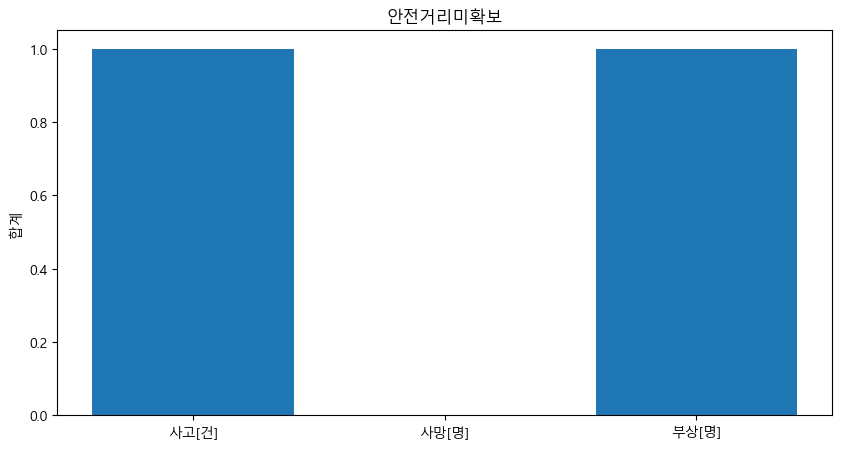

In [261]:
# < 안전거리미확보 시각화 > 
plt.figure(figsize=(10,5))
plt.bar(['사고[건]', '사망[명]', '부상[명]'], violation[['사고[건]', '사망[명]', '부상[명]']].values[8])
plt.title('안전거리미확보')
plt.ylabel('합계')
plt.show()